In [1]:
import datacube

In [2]:
dc = datacube.Datacube(app='day4')

In [3]:
from deafrica_tools.datahandling import load_ard

In [4]:
import geopandas as gpd

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [5]:
naivasha=gpd.read_file('lake_naivasha.geojson')
naivasha.explore()

In [6]:
extent=naivasha.total_bounds
extent

array([36.24991751, -0.85771195, 36.46743076, -0.64826021])

In [7]:
x_range = (extent[0], extent[2])
y_range = (extent[1], extent[3])

In [8]:
load_ard(dc,
         products=['s2_l2a'],
         min_gooddata = 0.9,
         output_crs='epsg:6933',
         resolution=(-20,20),
         x=x_range,
        y=y_range,
         time=('2020-01'),
        )

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Counting good quality pixels for each time step
Filtering to 6 out of 12 time steps with at least 90.0% good quality pixels
Applying pixel quality/cloud mask
Loading 6 time steps


<xarray.Dataset>
Dimensions:      (time: 6, y: 1337, x: 1051)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-09T08:00:05 ... 2020-01-19T08:...
  * y            (y) float64 -8.269e+04 -8.271e+04 ... -1.094e+05 -1.094e+05
  * x            (x) float64 3.498e+06 3.498e+06 ... 3.519e+06 3.519e+06
    spatial_ref  int32 6933
Data variables: (12/15)
    B01          (time, y, x) float32 nan nan nan nan ... 401.0 401.0 419.0
    B02          (time, y, x) float32 nan nan nan nan ... 603.0 603.0 589.0
    B03          (time, y, x) float32 nan nan nan nan ... 963.0 916.0 933.0
    B04          (time, y, x) float32 nan nan nan nan ... 855.0 910.0 891.0
    B05          (time, y, x) float32 nan nan nan ... 1.337e+03 1.334e+03
    B06          (time, y, x) float32 nan nan nan ... 2.185e+03 2.152e+03
    ...           ...
    B09          (time, y, x) float32 nan nan nan ... 2.613e+03 2.342e+03
    B11          (time, y, x) float32 nan nan nan ... 2.344e+03 2.266e+03
    B12          (time, y, x) float32 nan nan nan ... 1.76e+03 1.73e+03
    AOT          (time, y, x) float32 nan nan nan nan ... 169.0 169.0 169.0
    WVP          (time, y, x) float32 nan nan nan ... 1.538e+03 1.51e+03
    SCL          (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 ... 4 4 4 4 4 4 4 4 4 4
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

In [9]:
load_ard(dc,
         products=['s2_l2a'],
         min_gooddata = 0.9,
         output_crs='epsg:6933',
         resolution=(-20,20),
         x=x_range,
        y=y_range,
         time=('2020-01'),
         measurements=['red','green','blue','nir', 'swir_1']
        )

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Counting good quality pixels for each time step
Filtering to 6 out of 12 time steps with at least 90.0% good quality pixels
Applying pixel quality/cloud mask
Loading 6 time steps


<xarray.Dataset>
Dimensions:      (time: 6, y: 1337, x: 1051)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-09T08:00:05 ... 2020-01-19T08:...
  * y            (y) float64 -8.269e+04 -8.271e+04 ... -1.094e+05 -1.094e+05
  * x            (x) float64 3.498e+06 3.498e+06 ... 3.519e+06 3.519e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) float32 nan nan nan nan ... 855.0 910.0 891.0
    green        (time, y, x) float32 nan nan nan nan ... 963.0 916.0 933.0
    blue         (time, y, x) float32 nan nan nan nan ... 603.0 603.0 589.0
    nir          (time, y, x) float32 nan nan nan ... 2.426e+03 2.482e+03
    swir_1       (time, y, x) float32 nan nan nan ... 2.344e+03 2.266e+03
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

In [10]:
ds_s2_l2a=load_ard(dc,
         products=['s2_l2a'],
         min_gooddata = 0.9,
         output_crs='epsg:6933',
         resolution=(-20,20),
         x=x_range,
        y=y_range,
         time=('2020-01'),
         measurements=['red','green','blue','nir', 'swir_1']
        )

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Counting good quality pixels for each time step
Filtering to 6 out of 12 time steps with at least 90.0% good quality pixels
Applying pixel quality/cloud mask
Loading 6 time steps


In [11]:
ds_s2_l2a['red']

<xarray.DataArray 'red' (time: 6, y: 1337, x: 1051)>
array([[[  nan,   nan,   nan, ...,  440.,  440.,  413.],
        [  nan,   nan,   nan, ...,  358.,  423.,  415.],
        [  nan,   nan,   nan, ...,  342.,  379.,  419.],
        ...,
        [  nan,   nan,   nan, ..., 1126., 1110.,  980.],
        [  nan,   nan,   nan, ..., 1272., 1222., 1158.],
        [  nan,   nan,   nan, ..., 1416., 1588., 1310.]],

       [[ 346.,  321.,  438., ...,  420.,  421.,  386.],
        [ 294.,  306.,  475., ...,  395.,  421.,  408.],
        [ 419.,  384.,  516., ...,  325.,  365.,  436.],
        ...,
        [1234., 1222., 1166., ..., 1178., 1066.,  973.],
        [1170., 1110.,  910., ..., 1268., 1230., 1216.],
        [1080., 1003.,  695., ..., 1470., 1542., 1362.]],

       [[  nan,   nan,   nan, ..., 1460., 1620.,   nan],
        [  nan,   nan,   nan, ..., 1332., 1376., 1544.],
        [  nan,   nan,   nan, ..., 1394., 1460.,   nan],
        ...,
...
        ...,
        [ 560.,  606.,  605., ...,  892.,  850.,  831.],
        [ 505.,  532.,  673., ...,  821.,  818.,  828.],
        [ 398.,  535.,  571., ...,  850.,  813.,  821.]],

       [[  nan,   nan,   nan, ...,  486.,  508.,  489.],
        [  nan,   nan,   nan, ...,  416.,  491.,  463.],
        [  nan,   nan,   nan, ...,  389.,  435.,  489.],
        ...,
        [  nan,   nan,   nan, ...,  883.,  922.,  913.],
        [  nan,   nan,   nan, ...,  922.,  937.,  900.],
        [  nan,   nan,   nan, ...,  894.,  924.,  865.]],

       [[ 335.,  335.,  463., ...,  499.,  486.,  469.],
        [ 315.,  354.,  483., ...,  435.,  500.,  468.],
        [ 437.,  394.,  502., ...,  393.,  426.,  490.],
        ...,
        [ 634.,  728.,  681., ...,  901.,  866.,  886.],
        [ 526.,  564.,  776., ...,  944.,  940.,  905.],
        [ 424.,  584.,  655., ...,  855.,  910.,  891.]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-09T08:00:05 ... 2020-01-19T08:...
  * y            (y) float64 -8.269e+04 -8.271e+04 ... -1.094e+05 -1.094e+05
  * x            (x) float64 3.498e+06 3.498e+06 ... 3.519e+06 3.519e+06
    spatial_ref  int32 6933
Attributes:
    units:         1
    nodata:        0
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

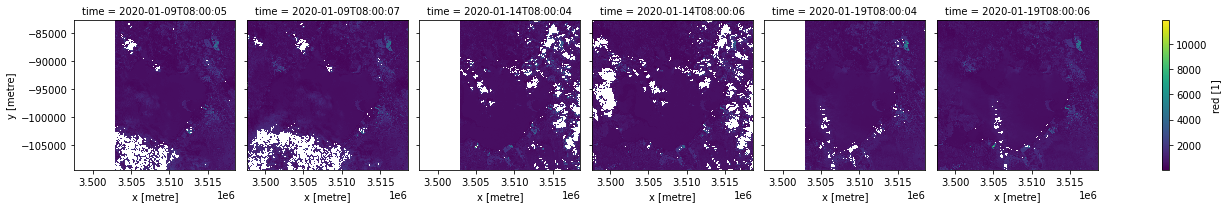

In [12]:
ds_s2_l2a['red'].plot(col='time')

In [13]:
ds_s2_l2a['green']

<xarray.DataArray 'green' (time: 6, y: 1337, x: 1051)>
array([[[  nan,   nan,   nan, ...,  662.,  718.,  661.],
        [  nan,   nan,   nan, ...,  588.,  662.,  671.],
        [  nan,   nan,   nan, ...,  561.,  604.,  644.],
        ...,
        [  nan,   nan,   nan, ..., 1142., 1124., 1022.],
        [  nan,   nan,   nan, ..., 1290., 1176., 1152.],
        [  nan,   nan,   nan, ..., 1416., 1514., 1372.]],

       [[ 536.,  504.,  613., ...,  649.,  702.,  634.],
        [ 512.,  521.,  669., ...,  604.,  662.,  656.],
        [ 584.,  520.,  604., ...,  552.,  575.,  638.],
        ...,
        [1326., 1232.,  974., ..., 1190., 1100., 1024.],
        [1222., 1130.,  802., ..., 1300., 1174., 1152.],
        [1138.,  864.,  935., ..., 1438., 1482., 1396.]],

       [[  nan,   nan,   nan, ..., 1498., 1564.,   nan],
        [  nan,   nan,   nan, ..., 1578., 1700., 1882.],
        [  nan,   nan,   nan, ..., 1556., 1758.,   nan],
        ...,
...
        ...,
        [ 720.,  711.,  679., ...,  969.,  954.,  946.],
        [ 605.,  656.,  704., ...,  886.,  915.,  962.],
        [ 544.,  614.,  642., ...,  992.,  881.,  922.]],

       [[  nan,   nan,   nan, ...,  706.,  719.,  727.],
        [  nan,   nan,   nan, ...,  598.,  673.,  671.],
        [  nan,   nan,   nan, ...,  587.,  602.,  678.],
        ...,
        [  nan,   nan,   nan, ...,  953.,  933.,  914.],
        [  nan,   nan,   nan, ...,  919.,  918.,  926.],
        [  nan,   nan,   nan, ...,  971.,  933.,  943.]],

       [[ 528.,  494.,  601., ...,  705.,  703.,  703.],
        [ 499.,  509.,  660., ...,  607.,  666.,  658.],
        [ 572.,  515.,  607., ...,  562.,  581.,  653.],
        ...,
        [ 763.,  768.,  714., ...,  938.,  919.,  892.],
        [ 649.,  667.,  808., ...,  937.,  904.,  923.],
        [ 541.,  656.,  730., ...,  963.,  916.,  933.]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-09T08:00:05 ... 2020-01-19T08:...
  * y            (y) float64 -8.269e+04 -8.271e+04 ... -1.094e+05 -1.094e+05
  * x            (x) float64 3.498e+06 3.498e+06 ... 3.519e+06 3.519e+06
    spatial_ref  int32 6933
Attributes:
    units:         1
    nodata:        0
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

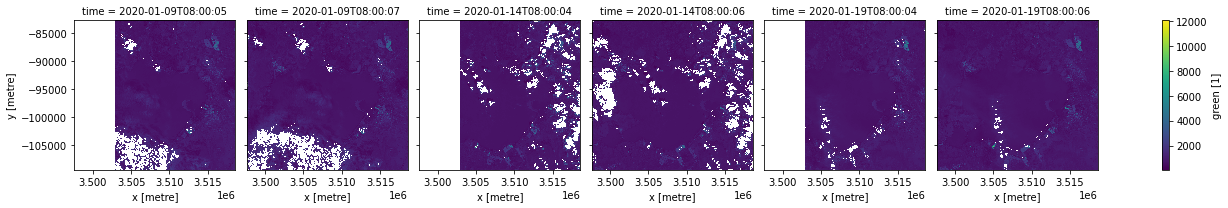

In [14]:
ds_s2_l2a['green'].plot(col='time')

In [15]:
ds_s2_l2a['blue']

<xarray.DataArray 'blue' (time: 6, y: 1337, x: 1051)>
array([[[  nan,   nan,   nan, ...,  337.,  342.,  331.],
        [  nan,   nan,   nan, ...,  311.,  339.,  310.],
        [  nan,   nan,   nan, ...,  291.,  309.,  312.],
        ...,
        [  nan,   nan,   nan, ...,  823.,  851.,  758.],
        [  nan,   nan,   nan, ...,  924.,  928.,  833.],
        [  nan,   nan,   nan, ..., 1044., 1058., 1016.]],

       [[ 258.,  238.,  316., ...,  283.,  311.,  292.],
        [ 232.,  239.,  345., ...,  297.,  315.,  277.],
        [ 348.,  299.,  363., ...,  248.,  285.,  285.],
        ...,
        [1136.,  991.,  658., ...,  854.,  777.,  719.],
        [1054.,  768.,  869., ...,  965.,  884.,  819.],
        [1064.,  783.,  958., ..., 1042., 1012., 1050.]],

       [[  nan,   nan,   nan, ..., 1390., 1480.,   nan],
        [  nan,   nan,   nan, ..., 1444., 1644., 1982.],
        [  nan,   nan,   nan, ..., 1428., 1584.,   nan],
        ...,
...
        ...,
        [ 456.,  446.,  450., ...,  646.,  608.,  602.],
        [ 389.,  408.,  477., ...,  603.,  569.,  616.],
        [ 336.,  414.,  457., ...,  614.,  565.,  654.]],

       [[  nan,   nan,   nan, ...,  327.,  336.,  332.],
        [  nan,   nan,   nan, ...,  275.,  318.,  306.],
        [  nan,   nan,   nan, ...,  261.,  283.,  326.],
        ...,
        [  nan,   nan,   nan, ...,  607.,  588.,  609.],
        [  nan,   nan,   nan, ...,  607.,  607.,  625.],
        [  nan,   nan,   nan, ...,  630.,  630.,  594.]],

       [[ 223.,  212.,  301., ...,  327.,  325.,  314.],
        [ 218.,  212.,  329., ...,  284.,  307.,  291.],
        [ 322.,  276.,  325., ...,  246.,  280.,  318.],
        ...,
        [ 452.,  458.,  508., ...,  608.,  558.,  565.],
        [ 388.,  416.,  532., ...,  580.,  589.,  592.],
        [ 294.,  411.,  449., ...,  603.,  603.,  589.]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-09T08:00:05 ... 2020-01-19T08:...
  * y            (y) float64 -8.269e+04 -8.271e+04 ... -1.094e+05 -1.094e+05
  * x            (x) float64 3.498e+06 3.498e+06 ... 3.519e+06 3.519e+06
    spatial_ref  int32 6933
Attributes:
    units:         1
    nodata:        0
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

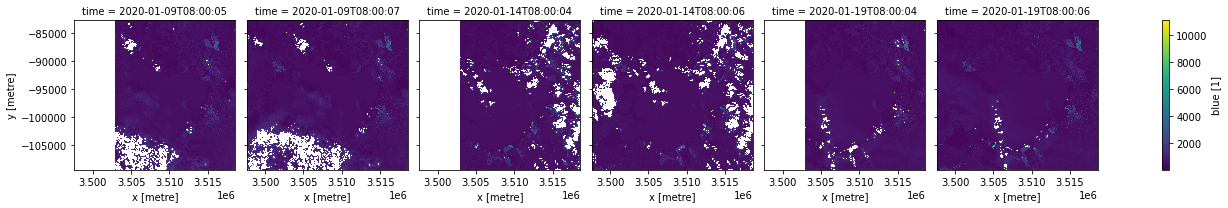

In [16]:
ds_s2_l2a['blue'].plot(col='time')

In [17]:
ds_s2_l2a['nir']

<xarray.DataArray 'nir' (time: 6, y: 1337, x: 1051)>
array([[[  nan,   nan,   nan, ..., 3672., 3550., 3665.],
        [  nan,   nan,   nan, ..., 3946., 3580., 3606.],
        [  nan,   nan,   nan, ..., 4069., 3763., 3572.],
        ...,
        [  nan,   nan,   nan, ..., 2802., 2642., 2566.],
        [  nan,   nan,   nan, ..., 2646., 2580., 2454.],
        [  nan,   nan,   nan, ..., 2996., 2974., 2876.]],

       [[3232., 3100., 2844., ..., 3782., 3636., 3724.],
        [3104., 3168., 3096., ..., 3828., 3602., 3564.],
        [2508., 2556., 2446., ..., 4192., 3918., 3552.],
        ...,
        [2378., 2256., 1714., ..., 2824., 2724., 2768.],
        [2188., 1902., 1802., ..., 2710., 2578., 2520.],
        [2244., 1888., 1950., ..., 3072., 2920., 2898.]],

       [[  nan,   nan,   nan, ..., 2835., 2889.,   nan],
        [  nan,   nan,   nan, ..., 2921., 3078., 3274.],
        [  nan,   nan,   nan, ..., 2887., 3078.,   nan],
        ...,
...
        ...,
        [2034., 1794., 1738., ..., 2432., 2472., 2338.],
        [1980., 1896., 1844., ..., 2294., 2264., 2468.],
        [1976., 1824., 1788., ..., 2700., 2388., 2454.]],

       [[  nan,   nan,   nan, ..., 3620., 3526., 3610.],
        [  nan,   nan,   nan, ..., 3892., 3510., 3507.],
        [  nan,   nan,   nan, ..., 4034., 3640., 3422.],
        ...,
        [  nan,   nan,   nan, ..., 2510., 2338., 2224.],
        [  nan,   nan,   nan, ..., 2268., 2238., 2320.],
        [  nan,   nan,   nan, ..., 2714., 2485., 2494.]],

       [[3174., 3144., 2996., ..., 3730., 3586., 3654.],
        [3016., 3082., 3128., ..., 3774., 3488., 3466.],
        [2492., 2542., 2404., ..., 4062., 3738., 3372.],
        ...,
        [2228., 2012., 1966., ..., 2470., 2408., 2412.],
        [2244., 2078., 2096., ..., 2206., 2216., 2278.],
        [2160., 2026., 2018., ..., 2766., 2426., 2482.]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-09T08:00:05 ... 2020-01-19T08:...
  * y            (y) float64 -8.269e+04 -8.271e+04 ... -1.094e+05 -1.094e+05
  * x            (x) float64 3.498e+06 3.498e+06 ... 3.519e+06 3.519e+06
    spatial_ref  int32 6933
Attributes:
    units:         1
    nodata:        0
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

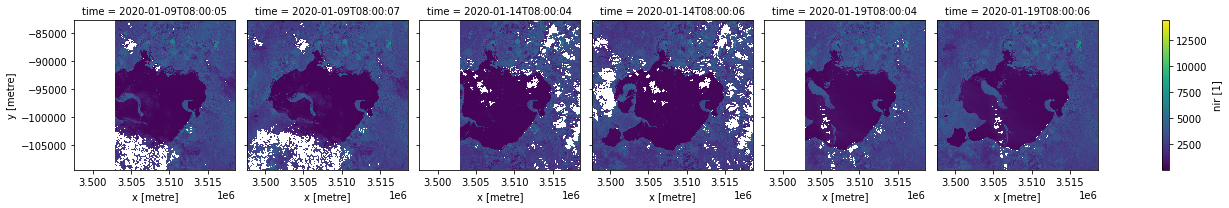

In [18]:
ds_s2_l2a['nir'].plot(col='time')

In [19]:
ds_s2_l2a['swir_1']

<xarray.DataArray 'swir_1' (time: 6, y: 1337, x: 1051)>
array([[[  nan,   nan,   nan, ..., 1538., 1507., 1549.],
        [  nan,   nan,   nan, ..., 1568., 1539., 1483.],
        [  nan,   nan,   nan, ..., 1633., 1636., 1547.],
        ...,
        [  nan,   nan,   nan, ..., 2884., 2807., 2647.],
        [  nan,   nan,   nan, ..., 2881., 2872., 2624.],
        [  nan,   nan,   nan, ..., 3074., 3098., 2844.]],

       [[1801., 1875., 2159., ..., 1540., 1511., 1577.],
        [1801., 1875., 2159., ..., 1557., 1523., 1490.],
        [1881., 1846., 2125., ..., 1634., 1616., 1533.],
        ...,
        [2017., 1967., 1973., ..., 2904., 2847., 2709.],
        [1932., 1906., 1850., ..., 2889., 2881., 2728.],
        [1895., 1806., 1675., ..., 3060., 3095., 2938.]],

       [[  nan,   nan,   nan, ..., 2399., 2524.,   nan],
        [  nan,   nan,   nan, ..., 2236., 2268., 2409.],
        [  nan,   nan,   nan, ..., 2205., 2207.,   nan],
        ...,
...
        ...,
        [1950., 2065., 2044., ..., 2419., 2367., 2296.],
        [1860., 1959., 2021., ..., 2254., 2179., 2110.],
        [1744., 1871., 2006., ..., 2409., 2317., 2218.]],

       [[  nan,   nan,   nan, ..., 1614., 1606., 1625.],
        [  nan,   nan,   nan, ..., 1649., 1626., 1580.],
        [  nan,   nan,   nan, ..., 1722., 1706., 1652.],
        ...,
        [  nan,   nan,   nan, ..., 2435., 2401., 2311.],
        [  nan,   nan,   nan, ..., 2289., 2270., 2121.],
        [  nan,   nan,   nan, ..., 2395., 2342., 2256.]],

       [[1796., 1873., 2180., ..., 1618., 1603., 1648.],
        [1796., 1873., 2180., ..., 1644., 1608., 1590.],
        [1935., 1873., 2150., ..., 1722., 1686., 1640.],
        ...,
        [2109., 2267., 2216., ..., 2469., 2416., 2372.],
        [1990., 2154., 2178., ..., 2298., 2279., 2179.],
        [1873., 2087., 2229., ..., 2389., 2344., 2266.]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-09T08:00:05 ... 2020-01-19T08:...
  * y            (y) float64 -8.269e+04 -8.271e+04 ... -1.094e+05 -1.094e+05
  * x            (x) float64 3.498e+06 3.498e+06 ... 3.519e+06 3.519e+06
    spatial_ref  int32 6933
Attributes:
    units:         1
    nodata:        0
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

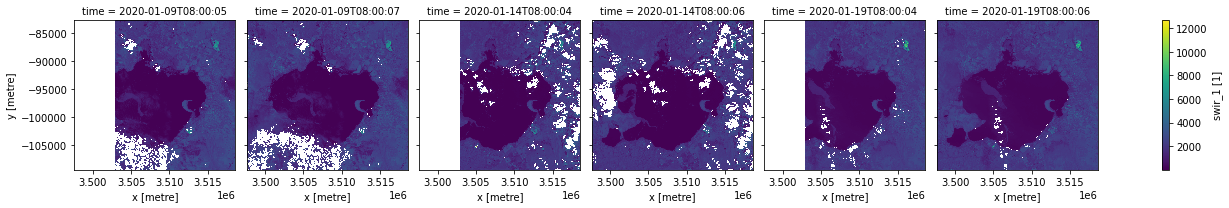

In [20]:
ds_s2_l2a['swir_1'].plot(col='time')

In [21]:
from deafrica_tools.plotting import rgb

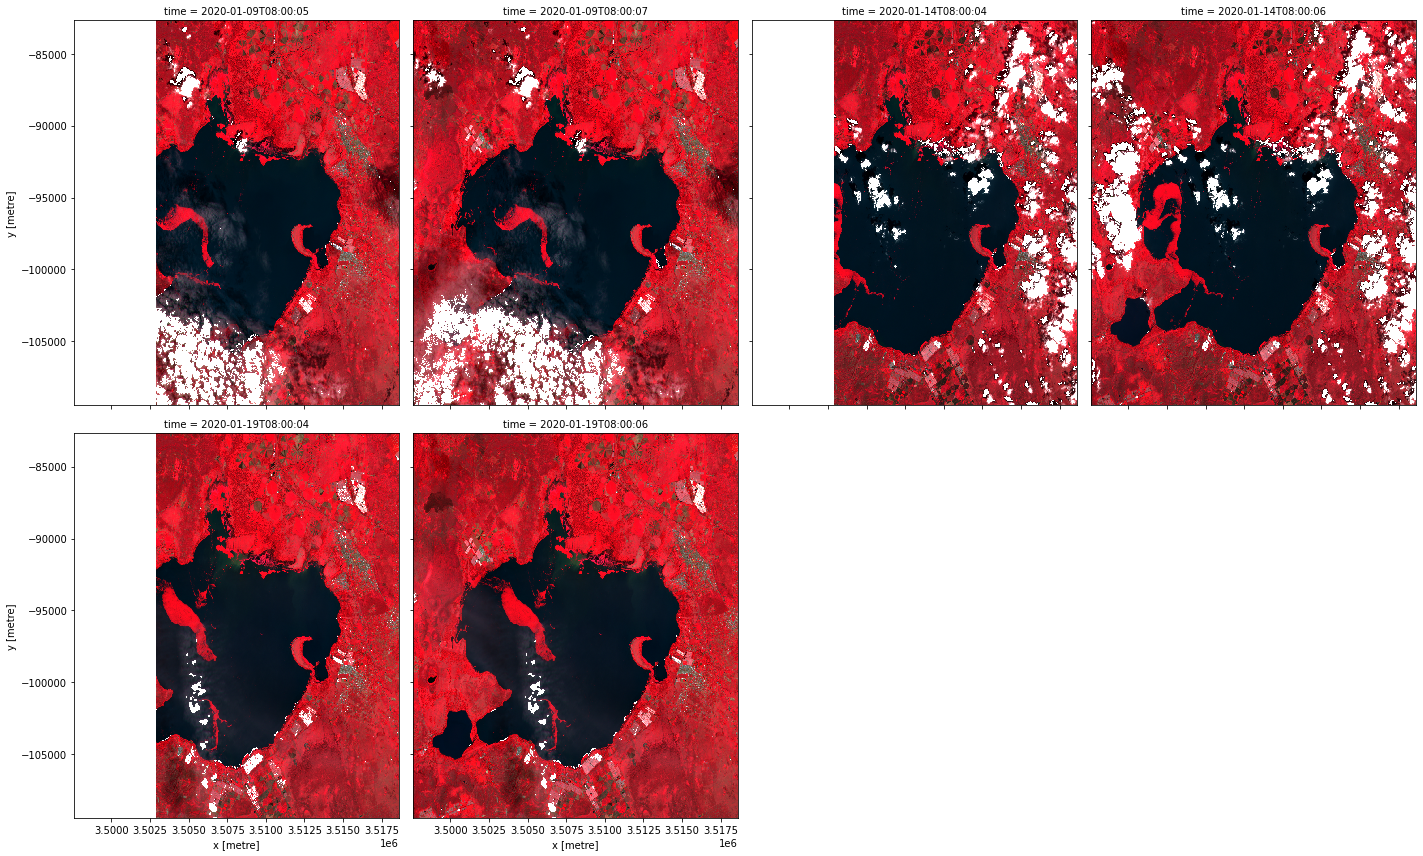

In [22]:
rgb(ds_s2_l2a, col='time', bands=['nir', 'red', 'green'])

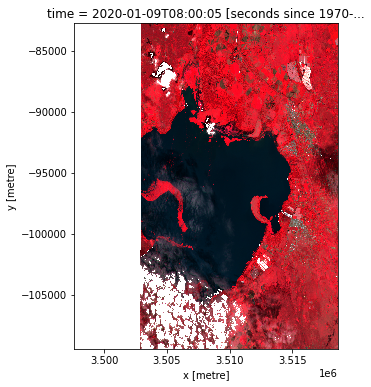

In [23]:
rgb(ds_s2_l2a, index=[0], bands=['nir', 'red', 'green'])

In [24]:
ndvi = ((ds_s2_l2a['nir']-ds_s2_l2a['red'])
        /
        (ds_s2_l2a['nir']+ds_s2_l2a['red'])
       )

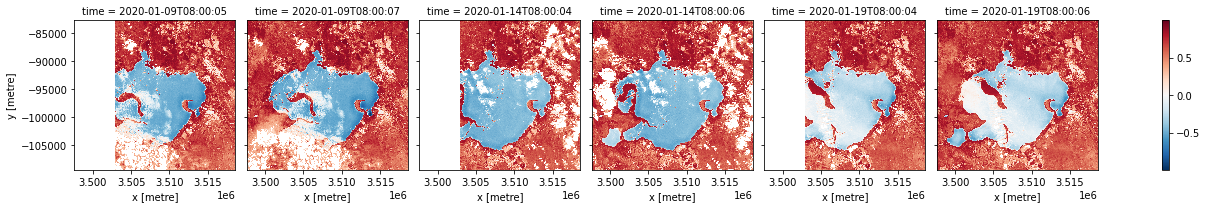

In [25]:
ndvi.plot(col='time')

In [26]:
mndwi = ((ds_s2_l2a['green']-ds_s2_l2a['swir_1'])
        /
        (ds_s2_l2a['green']+ds_s2_l2a['swir_1'])
       )

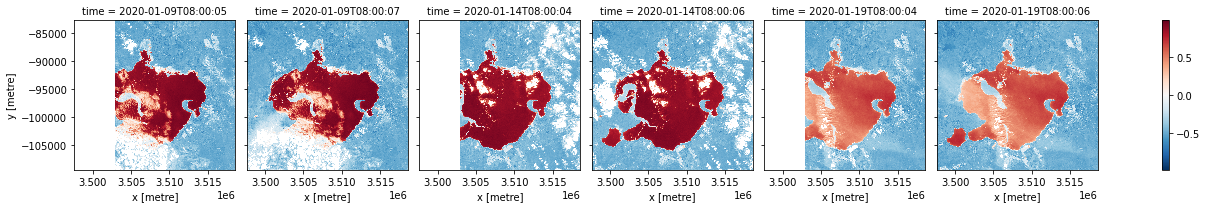

In [27]:
mndwi.plot(col='time')

In [28]:
evi = (2.5*(ds_s2_l2a['nir']-ds_s2_l2a['red'])
        /
        (ds_s2_l2a['nir']+6*ds_s2_l2a['red']-7.5*ds_s2_l2a['blue']+1)
       )

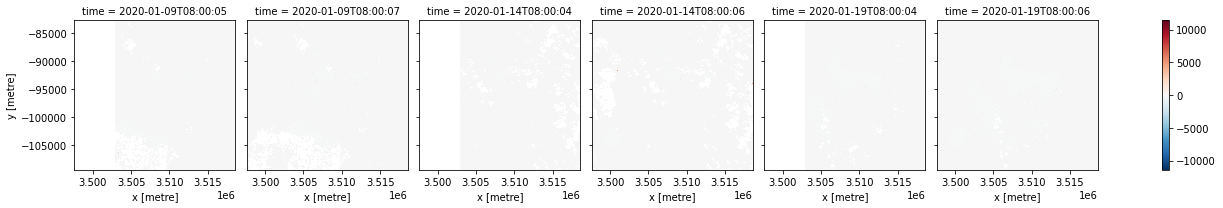

In [29]:
evi.plot(col='time')

In [30]:
from deafrica_tools.bandindices import calculate_indices

In [31]:
ds_s2_l2a = calculate_indices(ds_s2_l2a,
                              index=['EVI','NDVI','NDWI','MNDWI'],
                              satellite_mission='s2'
                             )

In [32]:
ds_s2_l2a

<xarray.Dataset>
Dimensions:      (time: 6, y: 1337, x: 1051)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-09T08:00:05 ... 2020-01-19T08:...
  * y            (y) float64 -8.269e+04 -8.271e+04 ... -1.094e+05 -1.094e+05
  * x            (x) float64 3.498e+06 3.498e+06 ... 3.519e+06 3.519e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) float32 nan nan nan nan ... 855.0 910.0 891.0
    green        (time, y, x) float32 nan nan nan nan ... 963.0 916.0 933.0
    blue         (time, y, x) float32 nan nan nan nan ... 603.0 603.0 589.0
    nir          (time, y, x) float32 nan nan nan ... 2.426e+03 2.482e+03
    swir_1       (time, y, x) float32 nan nan nan ... 2.344e+03 2.266e+03
    EVI          (time, y, x) float32 nan nan nan nan ... 0.3572 0.2836 0.2966
    NDVI         (time, y, x) float32 nan nan nan nan ... 0.5278 0.4544 0.4717
    NDWI         (time, y, x) float32 nan nan nan ... -0.4835 -0.4518 -0.4536
    MNDWI        (time, y, x) float32 nan nan nan nan ... -0.4254 -0.438 -0.4167
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

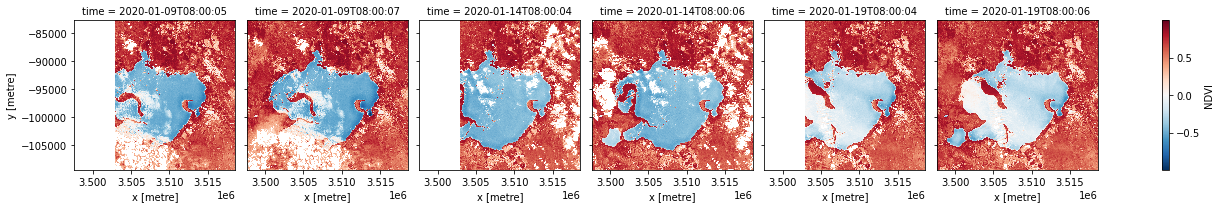

In [33]:
ds_s2_l2a['NDVI'].plot(col='time')

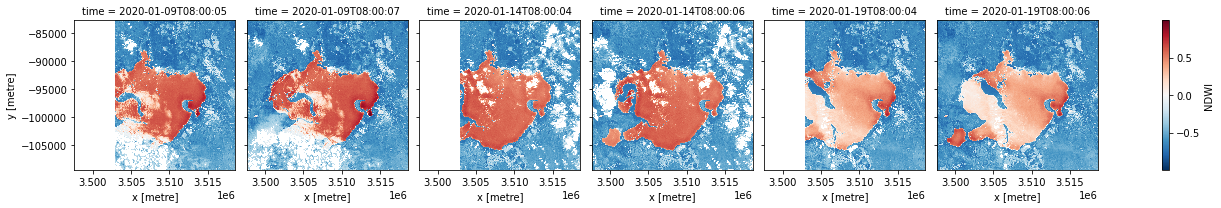

In [34]:
ds_s2_l2a['NDWI'].plot(col='time')

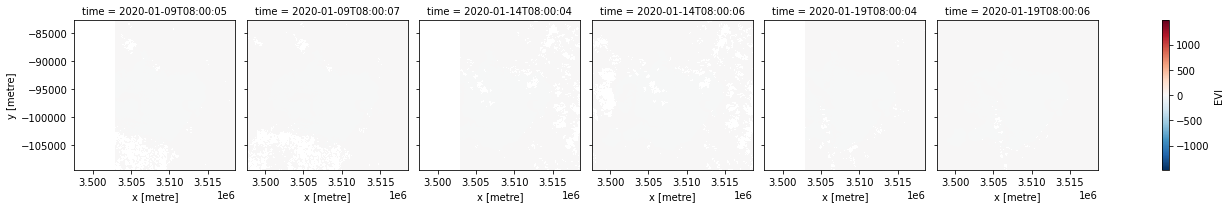

In [35]:
ds_s2_l2a['EVI'].plot(col='time')

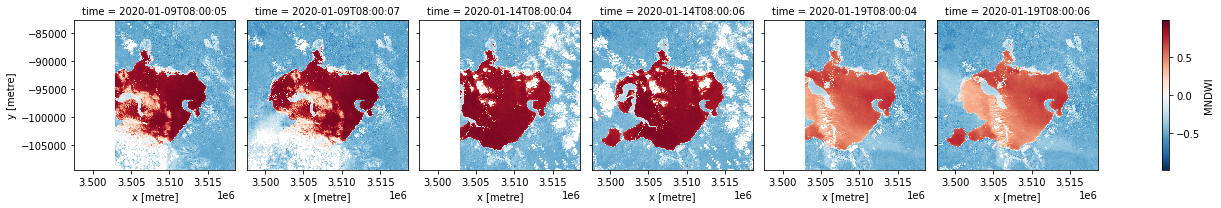

In [36]:
ds_s2_l2a['MNDWI'].plot(col='time')

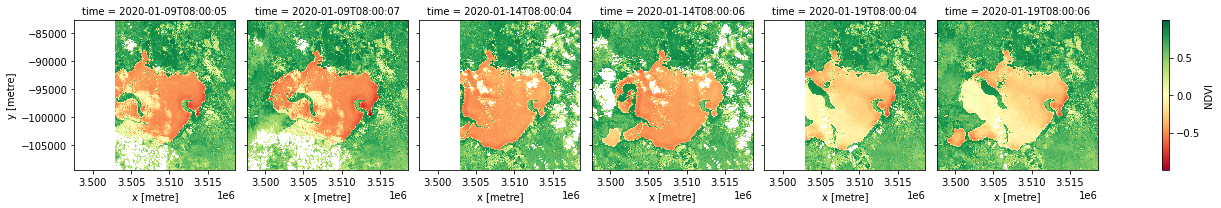

In [37]:
ds_s2_l2a['NDVI'].plot(col='time',cmap='RdYlGn')

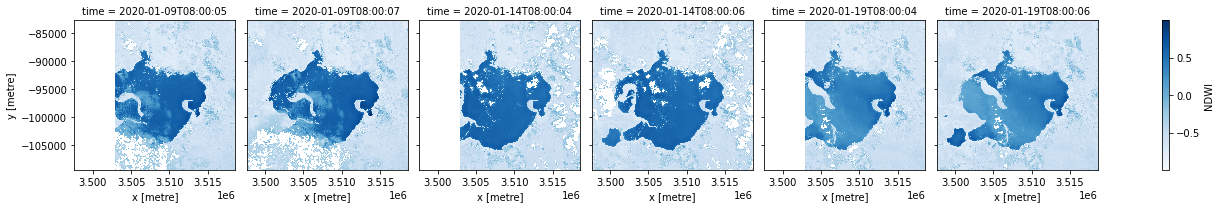

In [38]:
ds_s2_l2a['NDWI'].plot(col='time',cmap='Blues')

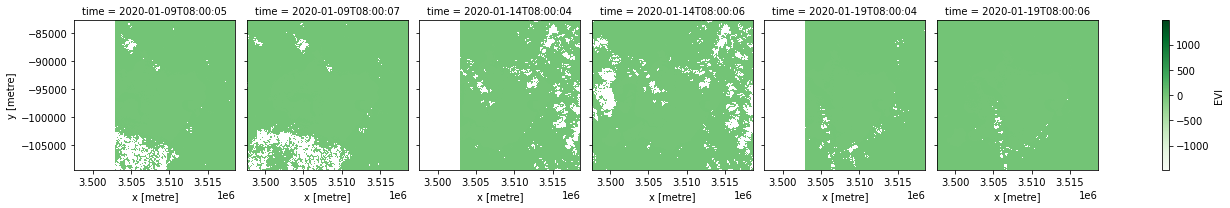

In [39]:
ds_s2_l2a['EVI'].plot(col='time',cmap='Greens')

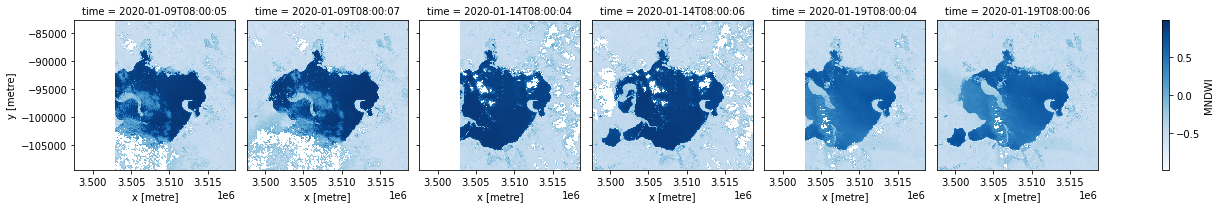

In [40]:
ds_s2_l2a['MNDWI'].plot(col='time',cmap='Blues')

In [41]:
enh_vegetated_area=ds_s2_l2a['EVI'].where(ds_s2_l2a['EVI']>0)

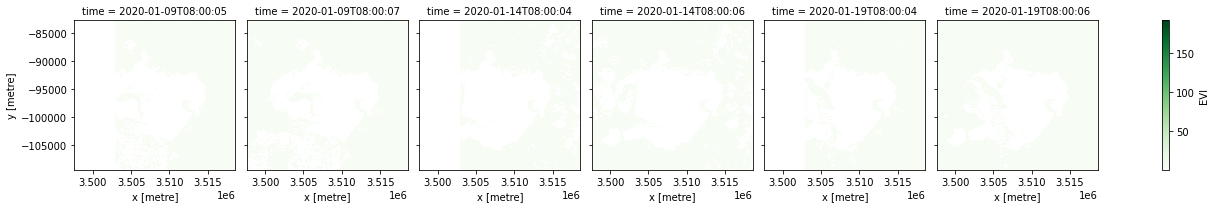

In [42]:
enh_vegetated_area.plot(col='time',cmap='Greens')

In [43]:
mod_water=ds_s2_l2a['MNDWI'].where(ds_s2_l2a['MNDWI']>0)

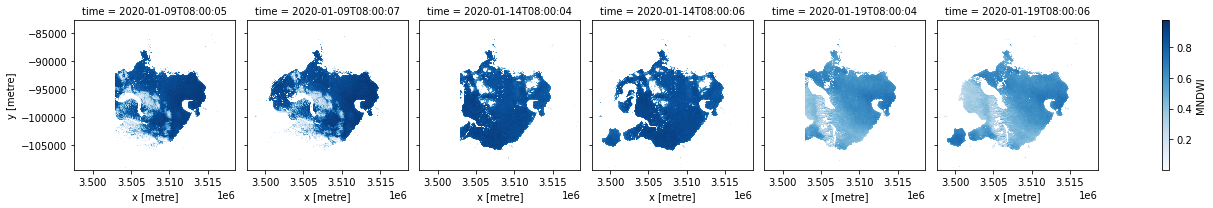

In [44]:
mod_water.plot(col='time',cmap='Blues')

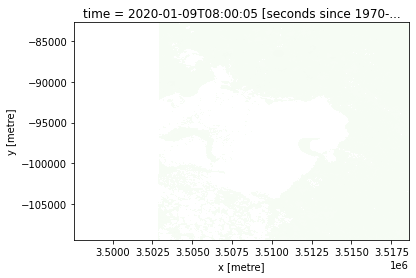

In [45]:
enh_vegetated_area.isel(time=0).plot(cmap='Greens', add_colorbar=False)

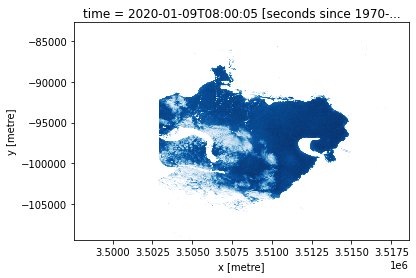

In [46]:
mod_water.isel(time=0).plot(cmap='Blues', add_colorbar=False)

In [47]:
enh_vegetated_area_graph_sum=ds_s2_l2a['EVI'].where(ds_s2_l2a['EVI']>0)

In [48]:
enh_vegetated_area_graph_sum=enh_vegetated_area_graph_sum.sum(dim=['x','y'])

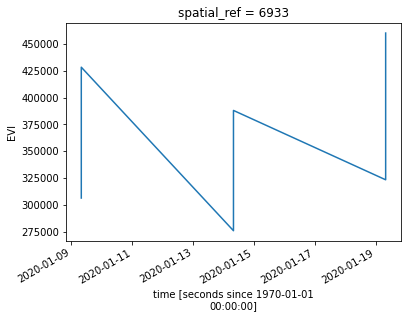

In [49]:
enh_vegetated_area_graph_sum.plot()

In [50]:
mod_water_graph_sum=ds_s2_l2a['MNDWI'].where(ds_s2_l2a['MNDWI']>0)

In [51]:
mod_water_graph_sum=mod_water_graph_sum.sum(dim=['x','y'])

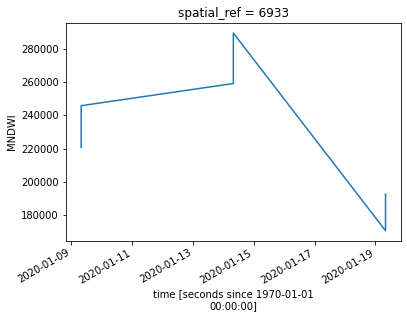

In [52]:
mod_water_graph_sum.plot()

In [53]:
enh_vegetated_area_map_sum=ds_s2_l2a['EVI'].where(ds_s2_l2a['EVI']>0)

In [54]:
enh_vegetated_area_map_sum=enh_vegetated_area_map_sum.sum(dim=['time'])

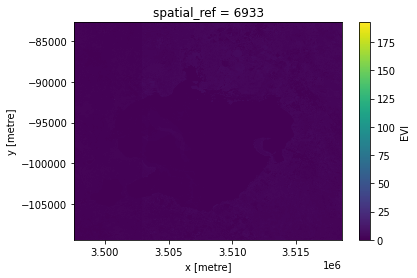

In [55]:
enh_vegetated_area_map_sum.plot()

In [56]:
mod_water_map_sum=ds_s2_l2a['MNDWI'].where(ds_s2_l2a['MNDWI']>0)

In [57]:
mod_water_map_sum=mod_water_map_sum.sum(dim=['time'])

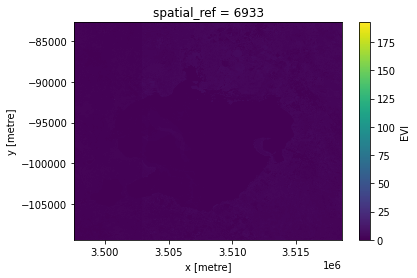

In [58]:
enh_vegetated_area_map_sum.plot()

In [59]:
enh_vegetated_area_graph_mean=ds_s2_l2a['EVI'].where(ds_s2_l2a['EVI']>0)

In [60]:
enh_vegetated_area_graph_mean=enh_vegetated_area_graph_mean.mean(dim=['x','y'])

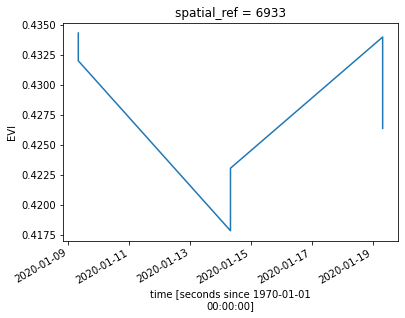

In [61]:
enh_vegetated_area_graph_mean.plot()

In [62]:
mod_water_graph_mean=ds_s2_l2a['MNDWI'].where(ds_s2_l2a['MNDWI']>0)

In [63]:
mod_water_graph_mean=mod_water_graph_mean.mean(dim=['x','y'])

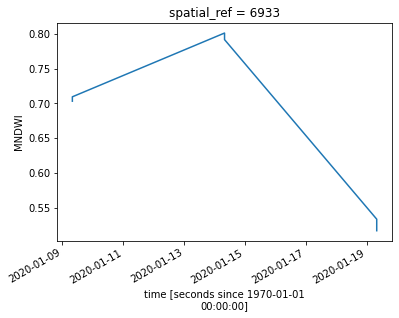

In [64]:
mod_water_graph_mean.plot()

In [65]:
enh_vegetated_area_map_mean=ds_s2_l2a['EVI'].where(ds_s2_l2a['EVI']>0)

In [66]:
enh_vegetated_area_map_mean=enh_vegetated_area_map_mean.mean(dim=['time'])

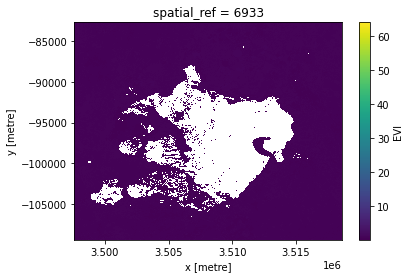

In [67]:
enh_vegetated_area_map_mean.plot()

In [68]:
mod_water_map_mean=ds_s2_l2a['MNDWI'].where(ds_s2_l2a['MNDWI']>0)

In [69]:
mod_water_map_mean=mod_water_map_mean.mean(dim=['time'])

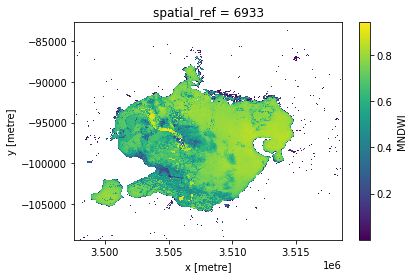

In [70]:
mod_water_map_mean.plot()

In [71]:
enh_vegetated_area_graph_std=ds_s2_l2a['EVI'].where(ds_s2_l2a['EVI']>0)

In [72]:
enh_vegetated_area_graph_std=enh_vegetated_area_graph_std.std(dim=['x','y'])

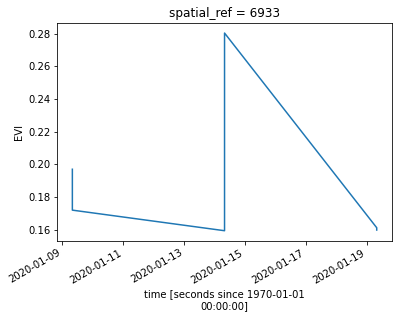

In [73]:
enh_vegetated_area_graph_std.plot()

In [74]:
mod_water_graph_std=ds_s2_l2a['MNDWI'].where(ds_s2_l2a['MNDWI']>0)

In [75]:
mod_water_graph_std=mod_water_graph_std.std(dim=['x','y'])

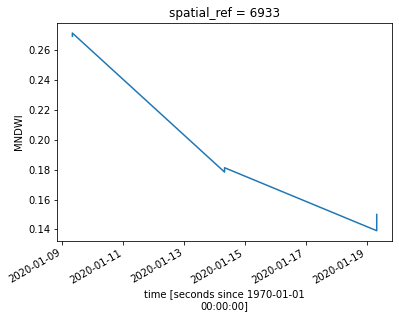

In [76]:
mod_water_graph_std.plot()

In [77]:
enh_vegetated_area_map_std=ds_s2_l2a['EVI'].where(ds_s2_l2a['EVI']>0)

In [78]:
enh_vegetated_area_map_std=enh_vegetated_area_map_std.std(dim=['time'])

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


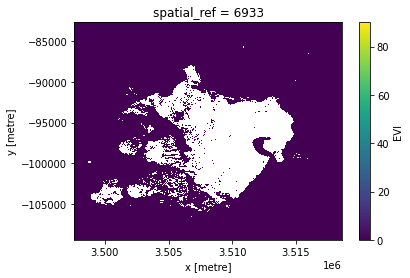

In [79]:
enh_vegetated_area_map_std.plot()

In [80]:
mod_water_map_std=ds_s2_l2a['MNDWI'].where(ds_s2_l2a['MNDWI']>0)

In [81]:
mod_water_map_std=mod_water_map_std.std(dim=['time'])

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


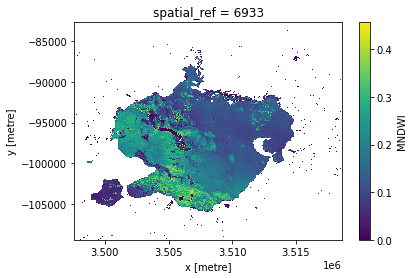

In [82]:
mod_water_map_std.plot()

In [83]:
#import numpy as np

In [84]:
#ndvi_fil=ds_s2_l2a['NDVI'].where(ds_s2_l2a['NDVI']>0)

In [85]:
ds_s2_l2a['NDVI_filtered']=ds_s2_l2a['NDVI'].where(ds_s2_l2a['NDVI']>=0)

In [86]:
ds_s2_l2a

<xarray.Dataset>
Dimensions:        (time: 6, y: 1337, x: 1051)
Coordinates:
  * time           (time) datetime64[ns] 2020-01-09T08:00:05 ... 2020-01-19T0...
  * y              (y) float64 -8.269e+04 -8.271e+04 ... -1.094e+05 -1.094e+05
  * x              (x) float64 3.498e+06 3.498e+06 ... 3.519e+06 3.519e+06
    spatial_ref    int32 6933
Data variables:
    red            (time, y, x) float32 nan nan nan nan ... 855.0 910.0 891.0
    green          (time, y, x) float32 nan nan nan nan ... 963.0 916.0 933.0
    blue           (time, y, x) float32 nan nan nan nan ... 603.0 603.0 589.0
    nir            (time, y, x) float32 nan nan nan ... 2.426e+03 2.482e+03
    swir_1         (time, y, x) float32 nan nan nan ... 2.344e+03 2.266e+03
    EVI            (time, y, x) float32 nan nan nan nan ... 0.3572 0.2836 0.2966
    NDVI           (time, y, x) float32 nan nan nan nan ... 0.5278 0.4544 0.4717
    NDWI           (time, y, x) float32 nan nan nan ... -0.4835 -0.4518 -0.4536
    MNDWI          (time, y, x) float32 nan nan nan ... -0.4254 -0.438 -0.4167
    NDVI_filtered  (time, y, x) float32 nan nan nan nan ... 0.5278 0.4544 0.4717
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

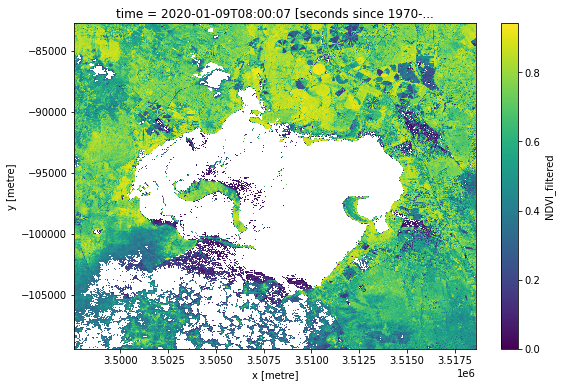

In [87]:
ds_s2_l2a['NDVI_filtered'].isel(time=1).plot(size=6)

In [88]:
import xarray as xr
import numpy as np

In [89]:
classes = [1,2,3]
class_label = ['Good','Average','Poor']

conditions = [
    (ds_s2_l2a['NDVI_filtered']>=0.5),
    (ds_s2_l2a['NDVI_filtered']>=0.2) & (ds_s2_l2a['NDVI_filtered']<0.5),
    (ds_s2_l2a['NDVI_filtered']>=0) & (ds_s2_l2a['NDVI_filtered']<0.2),
]

selection = np.select(conditions, classes)

In [90]:
classes = [1,2,3,4]
class_label = ['Good','Average','Poor','Non-vegetated']

conditions = [
    (ds_s2_l2a['NDVI']>=0.5),
    (ds_s2_l2a['NDVI']>=0.2) & (ds_s2_l2a['NDVI']<0.5),
    (ds_s2_l2a['NDVI']>=0) & (ds_s2_l2a['NDVI']<0.2),
    (ds_s2_l2a['NDVI']<0),
]

selection = np.select(conditions, classes)

In [91]:
selection

array([[[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [2, 2, 3, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]],

       [[0, 0, 0, ..., 2, 2, 0],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 0],
        ...,
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 1],
        [0, 0, 0, ..., 1, 2, 1]],

       [[0, 0, 0, ..., 2, 2, 0],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 0],
        ...,
        [1, 2, 2, ..., 2, 2, 2],
        [1, 1, 2, ..., 2, 2, 2],
        [1, 1, 1, ..., 1, 2, 2]],

       [[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 2, 2, 2],
   

In [92]:
ds_s2_l2a['categorised_ndvi'] = (xr.DataArray(selection, 
                                              coords={'time': ds_s2_l2a.time,
                                                      'y': ds_s2_l2a.y, 
                                                      'x': ds_s2_l2a.x},
                                              dims=['time', 'y', 'x']))

In [93]:
ds_s2_l2a

<xarray.Dataset>
Dimensions:           (time: 6, y: 1337, x: 1051)
Coordinates:
  * time              (time) datetime64[ns] 2020-01-09T08:00:05 ... 2020-01-1...
  * y                 (y) float64 -8.269e+04 -8.271e+04 ... -1.094e+05
  * x                 (x) float64 3.498e+06 3.498e+06 ... 3.519e+06 3.519e+06
    spatial_ref       int32 6933
Data variables:
    red               (time, y, x) float32 nan nan nan nan ... 855.0 910.0 891.0
    green             (time, y, x) float32 nan nan nan nan ... 963.0 916.0 933.0
    blue              (time, y, x) float32 nan nan nan nan ... 603.0 603.0 589.0
    nir               (time, y, x) float32 nan nan nan ... 2.426e+03 2.482e+03
    swir_1            (time, y, x) float32 nan nan nan ... 2.344e+03 2.266e+03
    EVI               (time, y, x) float32 nan nan nan ... 0.3572 0.2836 0.2966
    NDVI              (time, y, x) float32 nan nan nan ... 0.5278 0.4544 0.4717
    NDWI              (time, y, x) float32 nan nan nan ... -0.4518 -0.4536
    MNDWI             (time, y, x) float32 nan nan nan ... -0.438 -0.4167
    NDVI_filtered     (time, y, x) float32 nan nan nan ... 0.5278 0.4544 0.4717
    categorised_ndvi  (time, y, x) int64 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 2 1 1 2 2
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

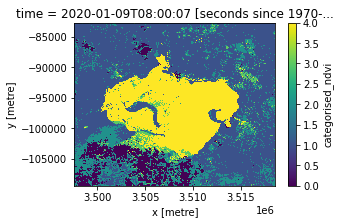

In [94]:
ds_s2_l2a['categorised_ndvi'].isel(time=1).plot(size=3)

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt

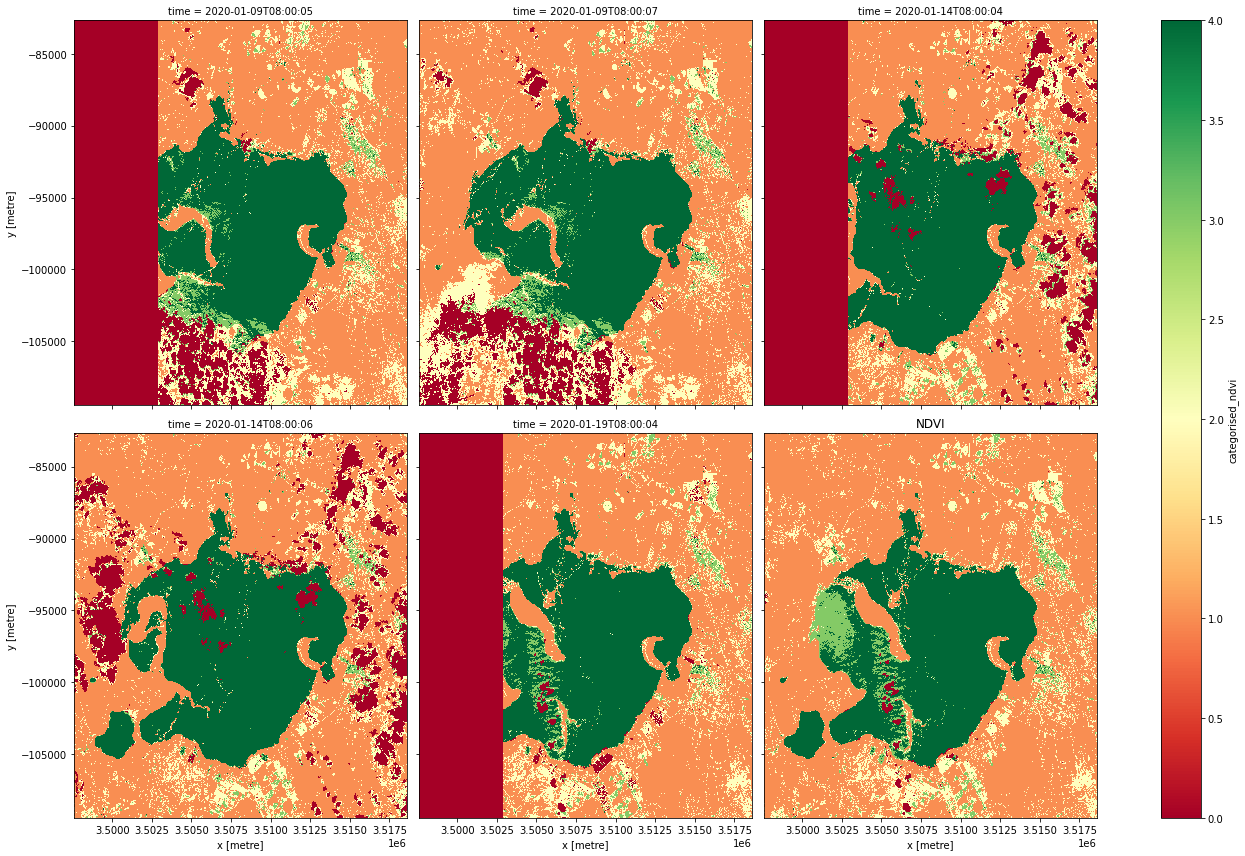

In [96]:
kap = ds_s2_l2a["categorised_ndvi"].plot(col='time', size=6, col_wrap=3, cmap="RdYlGn")
plt.title("NDVI")
plt.show()

In [97]:
#when searching for a color, search for hex code an google
classes = [0,1,2,3]
class_label = ['Non-vegetated','Good','Average','Poor']
class_colors =  ['black','green','#90ee90','yellow']

conditions = [
    (ds_s2_l2a['NDVI']<0),
    (ds_s2_l2a['NDVI']>=0.5),
    (ds_s2_l2a['NDVI']>=0.2) & (ds_s2_l2a['NDVI']<0.5),
    (ds_s2_l2a['NDVI']>=0) & (ds_s2_l2a['NDVI']<0.2),
]

selection = np.select(conditions, classes)

ds_s2_l2a['categorised_ndvi'] = (xr.DataArray(selection, 
                                              coords={'time': ds_s2_l2a.time,
                                                      'y': ds_s2_l2a.y, 
                                                      'x': ds_s2_l2a.x},
                                              dims=['time', 'y', 'x']))

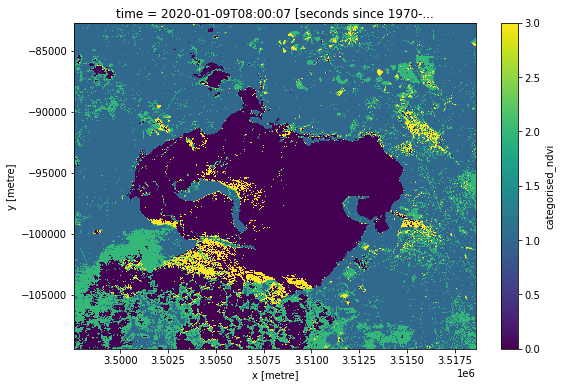

In [98]:
ds_s2_l2a['categorised_ndvi'].isel(time=1).plot(size=6)

In [99]:
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

In [100]:
color_map = mcolors.ListedColormap(class_colors, N=len(class_colors))

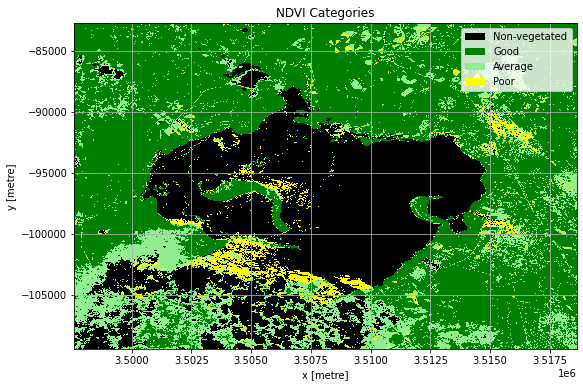

In [101]:
ds_s2_l2a['categorised_ndvi'].isel(time=1).plot(cmap=color_map, size=6, add_colorbar=False)
plt.title('NDVI Categories')
plt.legend(
    [
        Patch(facecolor=class_colors[0]),
        Patch(facecolor=class_colors[1]),
        Patch(facecolor=class_colors[2]),
        Patch(facecolor=class_colors[3]),
    ],
    [
        class_label[0],
        class_label[1],
        class_label[2],
        class_label[3]
    ]
)
plt.grid()
plt.show()

In [102]:
from datacube.utils.cog import write_cog

In [104]:
write_cog (ds_s2_l2a['categorised_ndvi'].isel(time=1).astype(float),
           fname='categorised_ndvi.tif', overwrite=True)

PosixPath('categorised_ndvi.tif')

In [111]:
time_series = ds_s2_l2a['NDVI_filtered'].mean(dim=['x','y'])

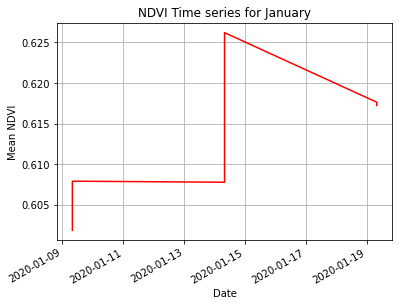

In [113]:
time_series.plot(color='red')
plt.title('NDVI Time series for January')
plt.grid()
plt.ylabel('Mean NDVI')
plt.xlabel('Date')
plt.show()

In [114]:
time_series

<xarray.DataArray 'NDVI_filtered' (time: 6)>
array([0.6018822, 0.6079286, 0.6077979, 0.626205 , 0.6176459, 0.6172461],
      dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-09T08:00:05 ... 2020-01-19T08:...
    spatial_ref  int32 6933

In [115]:
time_series.to_dataframe

<bound method DataArray.to_dataframe of <xarray.DataArray 'NDVI_filtered' (time: 6)>
array([0.6018822, 0.6079286, 0.6077979, 0.626205 , 0.6176459, 0.6172461],
      dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-09T08:00:05 ... 2020-01-19T08:...
    spatial_ref  int32 6933>

In [116]:
(time_series.to_dataframe()).to_csv('ndvi_timeseries.csv')

<AxesSubplot:>

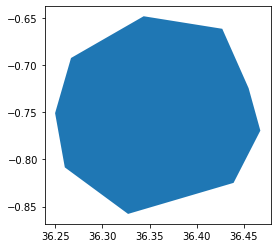

In [118]:
naivasha.plot()

In [ ]:
dc = datacube.Datav=cube(app='day4')

In [119]:
naivasha = gpd.read_file('lake_naivasha.geojson')

In [121]:
naivasha.explore()